In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

In [2]:
tf.__version__

'2.0.0'

In [3]:
train_image_path = glob.glob('./dc_2000/train/*/*.jpg')

In [4]:
len(train_image_path)

2000

In [5]:
train_image_path[-5:]

['./dc_2000/train\\dog\\dog.995.jpg',
 './dc_2000/train\\dog\\dog.996.jpg',
 './dc_2000/train\\dog\\dog.997.jpg',
 './dc_2000/train\\dog\\dog.998.jpg',
 './dc_2000/train\\dog\\dog.999.jpg']

In [6]:
p = './dc_2000/train\\dog\\dog.995.jpg'

In [7]:
int(p.split('\\')[1] == 'dog')

1

In [8]:
train_image_label = [int(p.split('\\')[1] == 'cat') for p in train_image_path]

In [9]:
train_image_label[-5:]

[0, 0, 0, 0, 0]

In [10]:
#数据处理管道
def load_and_preprosess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)   
    image = tf.image.resize(image, [256,256])
    image = tf.cast(image, tf.float32)
    image = image/255
    label = tf.reshape(label, [1])
    return image, label
    

In [11]:
train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path, train_image_label))   #包含路径和label的dataset

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE                     #AUTOTUNE根据cpu个数自动实现并行运算

In [13]:
train_image_ds = train_image_ds.map(load_and_preprosess_image, num_parallel_calls=AUTOTUNE)           #map函数，映射到所有对象上,并行运算个数设置为AUTOTUNE

In [14]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

In [15]:
BATCH_SIZE = 32
train_count = len(train_image_path)

In [16]:
train_image_ds = train_image_ds.shuffle(train_count).batch(BATCH_SIZE)
train_image_ds = train_image_ds.prefetch(AUTOTUNE)                   #在训练同时在后台预读取，加快训练速度

In [17]:
imgs, labels = next(iter(train_image_ds))

In [18]:
imgs.shape

TensorShape([32, 256, 256, 3])

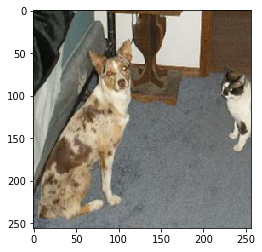

In [20]:
plt.imshow(imgs[0])

In [21]:
labels[0]

<tf.Tensor: id=52, shape=(1,), dtype=int32, numpy=array([0])>

创建模型